<a href="https://colab.research.google.com/github/ramanuj-neoma/ramanuj-neoma/blob/main/DIS_Single_MM_Spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  2 17:02:34 2020

@author: antoine.noel
"""

# The merge file

import numpy as np
import pandas as pa
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
############ STEP 1: IMPORT EXCEL DATA

tfile = pa.read_excel("/content/sample_data/DIS_trades_full.xlsx", \
                      sheet_name="DIS_trades_full",
                   header=0, index_col=None,
                   dtype={'Name': str, 'Value' : float})

qfile = pa.read_excel("/content/DIS_quotes_full.xlsx", \
                      sheet_name="DIS_quotes_full",
                   header=0, index_col=None,
                   dtype={'Name': str, 'Value' : float})

In [41]:
tfile.head()

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
0,DIS,1998-08-03,09:32:34,34.5625,100,0,0,NaN,T
1,DIS,1998-08-03,09:32:36,34.5625,185800,0,0,NaN,N
2,DIS,1998-08-03,09:32:38,34.5625,100,0,0,NaN,T
3,DIS,1998-08-03,09:32:38,34.5625,100,0,0,NaN,M
4,DIS,1998-08-03,09:32:38,34.5625,200,0,0,NaN,M


In [42]:
qfile.head()

,SYMBOL,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
0,DIS,1998-08-03,09:03:13,0.0,0.0000,0,0,12,T,SHAW
1,DIS,1998-08-03,09:03:13,0.0,0.0000,0,0,12,T,MADF
2,DIS,1998-08-03,09:03:13,0.0,0.0000,0,0,12,T,TRIM
3,DIS,1998-08-03,09:32:38,0.0,0.0000,0,0,12,C,NaN
4,DIS,1998-08-03,09:32:41,34.5,34.6875,161,20,10,N,NaN


In [43]:
############## STEP 2: DEFINE ONE TRADING DAY
y = 1998
m = 11
d = 24
DDAY = pa.Timestamp(year=y, month=m, day=d, hour=00)

In [44]:
############## STEP 3: CLEAN THE TRADE DATA

tday = tfile.values[:,1]
temp = tfile.values[:,2]
prices = tfile.values[:,3]
volumes = tfile.values[:,4]

hms = np.empty(len(temp),dtype=object)
for x in range(len(temp)):
    hms[x] = dt.datetime.combine(tday[x],temp[x])

In [45]:
hms

array([datetime.datetime(1998, 8, 3, 9, 32, 34),
       datetime.datetime(1998, 8, 3, 9, 32, 36),
       datetime.datetime(1998, 8, 3, 9, 32, 38), ...,
       datetime.datetime(1999, 4, 5, 12, 20, 19),
       datetime.datetime(1999, 4, 5, 12, 20, 32),
       datetime.datetime(1999, 4, 5, 12, 20, 33)], dtype=object)

In [46]:
# k1: Focus on one trading day
k1 = tday == DDAY
# k2: Ignore the earliest transactions
# due to possible quote unvailability
k2 = hms > dt.datetime(y,m,d,9,45,0)
k3 = hms < dt.datetime(y,m,d,16,0,0)
k4 = prices > 0 # remove anomalies
k5 = volumes > 0 # remove anomalies

In [47]:
np.sum(k1)

8855

In [48]:
K = k1 & k2 & k3 & k4 & k5

tday = tday[K]
hms = hms[K]
prices = prices[K]
volumes = volumes[K]


In [49]:
sexch = tfile.values[K,8]

In [50]:
################## STEP 4: WE CLEAN THE QUOTE FILE

# 3.A SELECT THE MOST ACTIVE MARKET MAKER ONLY
# 3.B SELECT THE TRADING DAY USED IN THE CLEAN TRADE FILE

k1 = qfile.values[:,1] == DDAY
k2 = qfile.values[:,9] == 'TRIM'
k3 = qfile.values[:,3] > 0 # anomalies
k4 = qfile.values[:,4] > 0 # anomalies
k5 = qfile.values[:,5] > 0 # anomalies
k6 = qfile.values[:,6] > 0 # anomalies
K = k1 & k2 & k3 & k4 & k5 & k6
qfileday = qfile.values[K,1]
qfilehms = qfile.values[K,2]
bid = qfile.values[K,3]
ask = qfile.values[K,4]
bidsize = qfile.values[K,5]
asksize = qfile.values[K,6]
trademode = qfile.values[K,7]
sexc =  qfile.values[K,8]
mm = qfile.values[K,9]

In [51]:
# del useles variable

del k1
del k2
del k3
del k4
del k5
del k6
del K

In [52]:
################## STEP 5: MERGE THE TWO DATASET

qfileHMS = np.empty(len(qfilehms),dtype=object)
for x in range(len(qfilehms)):
    qfileHMS[x] = dt.datetime.combine(DDAY,qfilehms[x])

In [53]:
print(qfileHMS)

[datetime.datetime(1998, 11, 24, 9, 35)
 datetime.datetime(1998, 11, 24, 9, 35, 1)
 datetime.datetime(1998, 11, 24, 9, 35, 2)
 datetime.datetime(1998, 11, 24, 9, 35, 4)
 datetime.datetime(1998, 11, 24, 9, 35, 11)
 datetime.datetime(1998, 11, 24, 9, 35, 12)
 datetime.datetime(1998, 11, 24, 9, 35, 15)
 datetime.datetime(1998, 11, 24, 9, 35, 15)
 datetime.datetime(1998, 11, 24, 9, 35, 15)
 datetime.datetime(1998, 11, 24, 9, 35, 18)
 datetime.datetime(1998, 11, 24, 9, 35, 19)
 datetime.datetime(1998, 11, 24, 9, 35, 20)
 datetime.datetime(1998, 11, 24, 9, 35, 26)
 datetime.datetime(1998, 11, 24, 9, 35, 35)
 datetime.datetime(1998, 11, 24, 9, 36, 13)
 datetime.datetime(1998, 11, 24, 9, 36, 28)
 datetime.datetime(1998, 11, 24, 9, 36, 28)
 datetime.datetime(1998, 11, 24, 9, 36, 28)
 datetime.datetime(1998, 11, 24, 9, 36, 31)
 datetime.datetime(1998, 11, 24, 9, 36, 31)
 datetime.datetime(1998, 11, 24, 9, 36, 32)
 datetime.datetime(1998, 11, 24, 9, 36, 34)
 datetime.datetime(1998, 11, 24, 9, 36,

In [54]:
N_trades = len(prices)
prevbid = np.empty(N_trades)
prevask = np.empty(N_trades)
tradeini = np.empty(N_trades)

for i in range(N_trades):
    tradetime = hms[i]
    for j in range(2,30*60): # delay for prevailing quotes
        prevtimetested = tradetime-timedelta(seconds=j)
        k = qfileHMS == prevtimetested
        if np.sum(k) > 0:
            break
    # Some explanations`of what is going on:
    # The algorthim looks for a bid ask pair 2 seconds before the trade,
    # if it does not exist, np.sum(k) == 0 and the algorthim
    # moves to the next iteration of the "For" statement,
    # that is it tries 3 seconds instead of 2 seconds and
    # verify if an bid/ask pair exists,
    # then it test 4 seconds,
    # then 5 seconds, up to maximum 180 seconds.
    # if a bid ask pair is found then np.sum(k) > 0 and Python
    # quits the loop thanks to the instruction "break".
    print('========================================')
    print('Transaction number: ',i)
    print('        Trade time: ',hms[i])
    print(' Transaction price: ',prices[i])
    print('  Prev. quote time: ',prevtimetested)
    print('    Prevailing bid: ',1*bid[k])
    print('    Prevailing ask: ',ask[k])
    prevbid[i] = bid[k][-1]
    prevask[i] = ask[k][-1]
    #If they are multiple quotes available
    # I retain the last bid / ask of my vector
    #(but it should not happen)
    des1 = np.abs(prevask[i]-prices[i])
    des2 = np.abs(prevbid[i]-prices[i])
    # Trade initiation: I  apply the quote rule below
    if des1 == des2:
        tradeini[i] = np.nan
        print('The trade occurs at the midpoint')
    elif des1 > des2:
        tradeini[i] = -1
        print('The trade is seller-initiated')
    else:
        tradeini[i] = 1
        print('The trade is buyer-initiated')
    print(' ')

Streaming output truncated to the last 5000 lines.
  Prev. quote time:  1998-11-24 15:28:22
    Prevailing bid:  [29.6875]
    Prevailing ask:  [29.8125]
The trade occurs at the midpoint
 
Transaction number:  7411
        Trade time:  1998-11-24 15:30:47
 Transaction price:  29.75
  Prev. quote time:  1998-11-24 15:28:22
    Prevailing bid:  [29.6875]
    Prevailing ask:  [29.8125]
The trade occurs at the midpoint
 
Transaction number:  7412
        Trade time:  1998-11-24 15:30:48
 Transaction price:  29.6875
  Prev. quote time:  1998-11-24 15:28:22
    Prevailing bid:  [29.6875]
    Prevailing ask:  [29.8125]
The trade is seller-initiated
 
Transaction number:  7413
        Trade time:  1998-11-24 15:30:49
 Transaction price:  29.6875
  Prev. quote time:  1998-11-24 15:28:22
    Prevailing bid:  [29.6875]
    Prevailing ask:  [29.8125]
The trade is seller-initiated
 
Transaction number:  7414
        Trade time:  1998-11-24 15:30:55
 Transaction price:  29.75
  Prev. quote time:  19

In [55]:
# it can be to be replaced by merge_asof which seems powerful.
# Example: Final=pd.merge_asof(Trades,Quotes, \
#    on='TIME',by='SYMBOL',tolerance=pd.Timedelta('5s'))
# I let you work on this function (homework)


mymatrix = [prices,prevbid,prevask,tradeini] ;

############ STEP 6: EFFECTIVE SPREAD AND ORDER FLOW IMBALANCE

tr_prices = np.array(prices,dtype=float)
eff_spread = np.nanmean( \
                        2*tradeini*(tr_prices-0.5*(prevask+prevbid)))

# This is a pairwise multiplication.
# The calculation will work as long as the vectors
# have all the same dimension.

ordf_im = (np.sum(tradeini==1)-np.sum(tradeini==-1))/ \
    np.sum(1-np.isnan(tradeini))
print('Average daily effective spread (in c.): ', \
      np.round(100*eff_spread))
print('     Daily order-flow imbalance (in %): ', \
      np.round(100*ordf_im))

Average daily effective spread (in c.):  12.0
     Daily order-flow imbalance (in %):  23.0


In [64]:
ret = ((tr_prices[-1]-tr_prices[0])/tr_prices[0])*100

In [65]:
print(ret)

-0.4166666666666667


9
10
11
12
13
14
15


([<matplotlib.axis.XTick at 0x7fd7c6ed5f10>,
 [Text(0, 0, '9-10 am'),
  Text(0, 0, '10-11 am'),
  Text(0, 0, '11-12 am'),
  Text(0, 0, '12am-1pm'),
  Text(0, 0, '1-2 pm'),
  Text(0, 0, '2-3 pm'),
  Text(0, 0, '3-4 pm')])

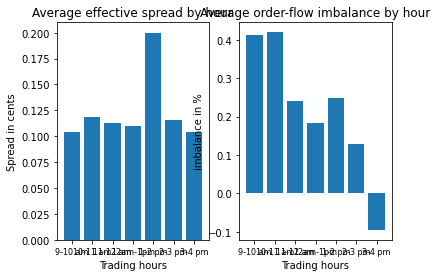

In [66]:
################### STEP 7: EFFECTIVE SPREAD BY TRADING HOUR

eff_spread = np.empty(7)
orderfi = np.empty(7)

for i in range(9,16):
    print(i)
    k = (hms > dt.datetime(y,m,d,i,0,0)) & \
        (hms < dt.datetime(y,m,d,i+1,0,0))
    effs = 2*tradeini[k]*(tr_prices[k]-0.5*(prevask[k]+prevbid[k]))
    ofi = (np.sum(tradeini[k]==1)-np.sum(tradeini[k]==-1))/ \
        np.sum(1-np.isnan(tradeini[k]))
    eff_spread[i-9] = np.nanmean(effs)
    orderfi[i-9] = np.nanmean(ofi)

x = np.arange(7)
trng = ('9-10 am', '10-11 am', '11-12 am', '12am-1pm', '1-2 pm', '2-3 pm', '3-4 pm')

plt.subplot(1,2,1)
plt.bar(x,eff_spread)
plt.title('Average effective spread by hour')
plt.xlabel('Trading hours')
plt.ylabel('Spread in cents')
plt.xticks(x, trng,fontsize=8)

plt.subplot(1,2,2)
plt.bar(x,orderfi)
plt.title('Average order-flow imbalance by hour')
plt.xlabel('Trading hours')
plt.ylabel('imbalance in %')
plt.xticks(x, trng,fontsize=8)